# **1.0** Data Normalisation and Standardisation
<div style="text-align:justify">
Chapter 2.3.1.3 presents the importance of data with equal scales to avoid bias during algorithmic data analysis. To achieve this, data normalisation is necessary to alter the range of values from their minimum and maximum to a range between -1 and 1 or 0 and 1, depending on the chosen normalisation method. Additionally, multiple scaling methods are available. Scikit-learn provides Python implementations such as the StandardScaler, the MinMaxScaler or the RobustScaler. <br>
Further examples and methods are listed here: <br> <link>https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html<link>
<br>
<br>
In order to determine the optimal scaling method, various methods will be compared based on their impacts on the input data.</div>

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import joblib
# Importing saved data from first jupyter notebook.
run = "2"
path = "cut_df_"+run+".csv"
df_cut = pd.read_csv(path)

# Drop categorical variables of type = object as required for scaling.
df_cut.drop(columns=["TimeStamp"], inplace=True)


In [13]:
temp = df_cut.copy()
# Drop PumpCode column if variation is 0.
if df_cut["PumpCode"].std() == 0:
    temp.drop(columns="PumpCode", inplace=True)

if "SnCode" in temp.columns:
    temp.drop(columns="SnCode",inplace=True)

# Calculate metrics of data before scaling.    
temp.describe().round(2)    


,Current,Power,MotorSpeed,P_In,P_Out,T_Out,dP,dE,dT,dCO2,Alert,Reopen count,PressureRange,RunningHours,TotalEnergyConsumption,TotalCO2Impact
count,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.0,195567.00,195567.00,195567.00
mean,49.14,10.55,1546.07,389.32,1070.24,88.67,9.49,0.31,106.61,0.07,0.24,0.55,8.0,4100.12,63221.97,11761.37
std,24.11,6.94,991.63,51.19,30.71,25.09,50.31,0.34,139.71,0.08,0.84,3.57,0.0,1329.76,18372.34,5317.12
min,0.10,0.00,-3.00,255.99,992.06,22.43,0.00,0.00,0.00,0.00,0.00,0.00,8.0,0.00,0.00,0.00
25%,57.20,4.50,666.00,388.61,1051.95,91.37,0.50,0.05,21.00,0.00,0.00,0.00,8.0,2991.68,49776.75,8139.39
50%,59.50,11.50,1713.00,389.85,1080.62,99.30,1.07,0.11,60.00,0.03,0.00,0.00,8.0,4689.04,71516.33,14167.83
75%,61.90,15.20,2271.00,390.83,1092.58,103.18,2.40,0.55,121.00,0.15,0.00,0.00,8.0,5238.76,78431.48,16085.10
max,98.80,44.00,5001.00,1028.63,1165.41,120.08,638.69,5.00,1924.00,10.00,4.00,69.00,8.0,5465.93,80646.00,16690.82


In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195567 entries, 0 to 195566
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Current                 195567 non-null  float64
 1   Power                   195567 non-null  float64
 2   MotorSpeed              195567 non-null  float64
 3   P_In                    195567 non-null  float64
 4   P_Out                   195567 non-null  float64
 5   T_Out                   195567 non-null  float64
 6   dP                      195567 non-null  float64
 7   dE                      195567 non-null  float64
 8   dT                      195567 non-null  int64  
 9   dCO2                    195567 non-null  float64
 10  Alert                   195567 non-null  float64
 11  Reopen count            195567 non-null  float64
 12  PressureRange           195567 non-null  int64  
 13  RunningHours            195567 non-null  float64
 14  TotalEnergyConsumpti

In [15]:
# Drop categorical "Serial_No" parameter if the parameter is still in the dataset
if "Serial_No" in temp.columns:
    temp.drop(columns="Serial_No", inplace=True)

data = temp.values
print(data)

[[5.979000e+01 1.200000e+01 1.878000e+03 ... 5.465930e+03 8.064600e+04
  1.669082e+04]
 [5.979000e+01 1.170000e+01 1.878000e+03 ... 5.465930e+03 8.064600e+04
  1.669082e+04]
 [5.979000e+01 1.170000e+01 1.878000e+03 ... 5.465930e+03 8.064600e+04
  1.669082e+04]
 ...
 [6.709000e+01 0.000000e+00 3.570000e+03 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [6.709000e+01 0.000000e+00 3.570000e+03 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [6.709000e+01 0.000000e+00 3.192000e+03 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


In [16]:
# Optional implementation of robustscaler. Scikit-Learn Robust-Scaler is preferred, since it cover more cases. 
# Define and apply two-sigma normalization
def two_sigma_normalization(data):
    # Step 1: Compute the mean and standard deviation for each column
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)

    # Step 2: Normalize the data using 2-sigma normalization for each column
    data_normalized = (data - data_mean) / (2 * data_std)

    return data_normalized

# Calculate two-sigma normalized dataset
#normalized_data = two_sigma_normalization(data=data)

In [17]:
# Testing different normalization methods and saving the models:
# Optional:
#save_path ="C:/Users/a00546973/Desktop/MasterGENIUS/Models/minmax_scaler_GHS2002_I37.pkl"
# Scaling normalized data from two-sigma normalisation with MinMaxScaler and Standard-Scaler
#minmax_scaler = MinMaxScaler().fit(normalized_data)
#joblib.dump(minmax_scaler, save_path)
#sc_df_MM = minmax_scaler.transform(normalized_data)

# Scaling with StandardScaler
sc_df_SSc = StandardScaler().fit_transform(temp)

# Scaling data with RobustScaler
sc_df_RSc = RobustScaler(quantile_range=(25,75)).fit(temp)
save_path ="robust_scaler_GHS2002_"+run+".pkl"
joblib.dump(sc_df_RSc, save_path)
robust_data = sc_df_RSc.transform(temp)

# Scaling robust scaled data with MinMaxScaler and StandardScaler
sc_df_MM_RM = MinMaxScaler().fit(robust_data)
save_path ="MMRM_scaler_GHS2002_"+run+".pkl"
joblib.dump(sc_df_MM_RM, save_path)
sc_df_MM_RM_data = sc_df_MM_RM.transform(robust_data)
sc_df_RSc_SSc = StandardScaler().fit_transform(robust_data)


In [18]:
# Creating list of scaled data to compare the different scaling methods
# Creating dataframes
scaled_df_1 = pd.DataFrame(sc_df_SSc, columns=temp.columns)
scaled_df_2 = pd.DataFrame(robust_data, columns=temp.columns)
scaled_df_3 = pd.DataFrame(sc_df_MM_RM_data, columns=temp.columns)

# Creating list
df_list = [scaled_df_1,scaled_df_2, scaled_df_3]

## Results of Scaling

<div style="text-align:justify">
Since scikit-learn provides implementations of many different standardisation and normalisation methods, it is uncertain which method is the most suitable for the given dataset. To scale the data into the range 0 to 1, a MinMaxScaler may be applied. Further, it is evident that the dataset includes some outliers. For this reason, a two-sigma normalisation or the robust scaler can be applied before scaling the data to 0 to 1. Additionally, the StandardScaler is used to compare standardisation with the normalisation of the MinMaxScaler. <br>
--> Insert info about plots
<div>

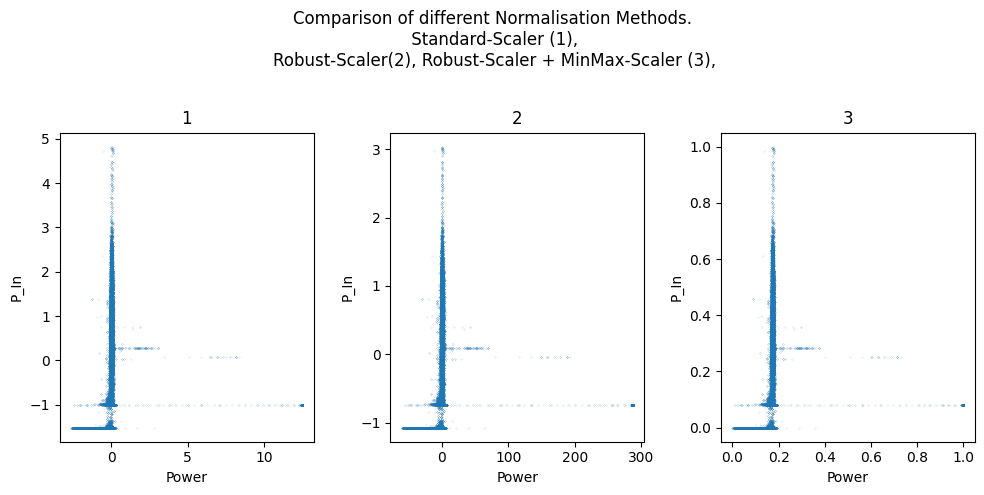

In [19]:
fig,axs = plt.subplots(1,3, figsize=(10,5))
i=0
for data in df_list: 
   axs[i].scatter(x=data["P_In"].values,y=data["Power"].values,s=0.005)
   axs[i].set_title(str(i+1))
   axs[i].set_ylabel("P_In")
   axs[i].set_xlabel("Power")
   i+=1
      
plt.suptitle("Comparison of different Normalisation Methods. \n Standard-Scaler (1), \nRobust-Scaler(2), Robust-Scaler + MinMax-Scaler (3),\n")
plt.tight_layout()
plt.show()          

<div style="text-align:justify">
Comparing the metrics of scaled data 4 and 5 confirms that applying the two-sigma standardisation is equal to the RobustScaler, which standardises the data by scaling the data base on the data within the 25th and 75th percentile. 
Since the RobustScaler is provided by scikit-learn, the RobustScaler is used to standardise the data before normalising to the range between 0 and 1. 
<div>

In [20]:
scaled_df_3.describe().round(2)

,Current,Power,MotorSpeed,P_In,P_Out,T_Out,dP,dE,dT,dCO2,Alert,Reopen count,PressureRange,RunningHours,TotalEnergyConsumption,TotalCO2Impact
count,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.00,195567.0,195567.00,195567.00,195567.00
mean,0.50,0.24,0.31,0.17,0.45,0.68,0.01,0.06,0.06,0.01,0.06,0.01,0.0,0.75,0.78,0.70
std,0.24,0.16,0.20,0.07,0.18,0.26,0.08,0.07,0.07,0.01,0.21,0.05,0.0,0.24,0.23,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,0.58,0.10,0.13,0.17,0.35,0.71,0.00,0.01,0.01,0.00,0.00,0.00,0.0,0.55,0.62,0.49
50%,0.60,0.26,0.34,0.17,0.51,0.79,0.00,0.02,0.03,0.00,0.00,0.00,0.0,0.86,0.89,0.85
75%,0.63,0.35,0.45,0.17,0.58,0.83,0.00,0.11,0.06,0.01,0.00,0.00,0.0,0.96,0.97,0.96
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00


### Investigation of Correlation

<div style="text-align:justify">
Plotting the heatmap of the correlations among the parameters shows that the normalisation and standardisation of the data retains the correlations from the unscaled data. Therefore, it can be assumed that scaling the data with the RobustScaler followed by MinMax normalisation is a suitable choice.

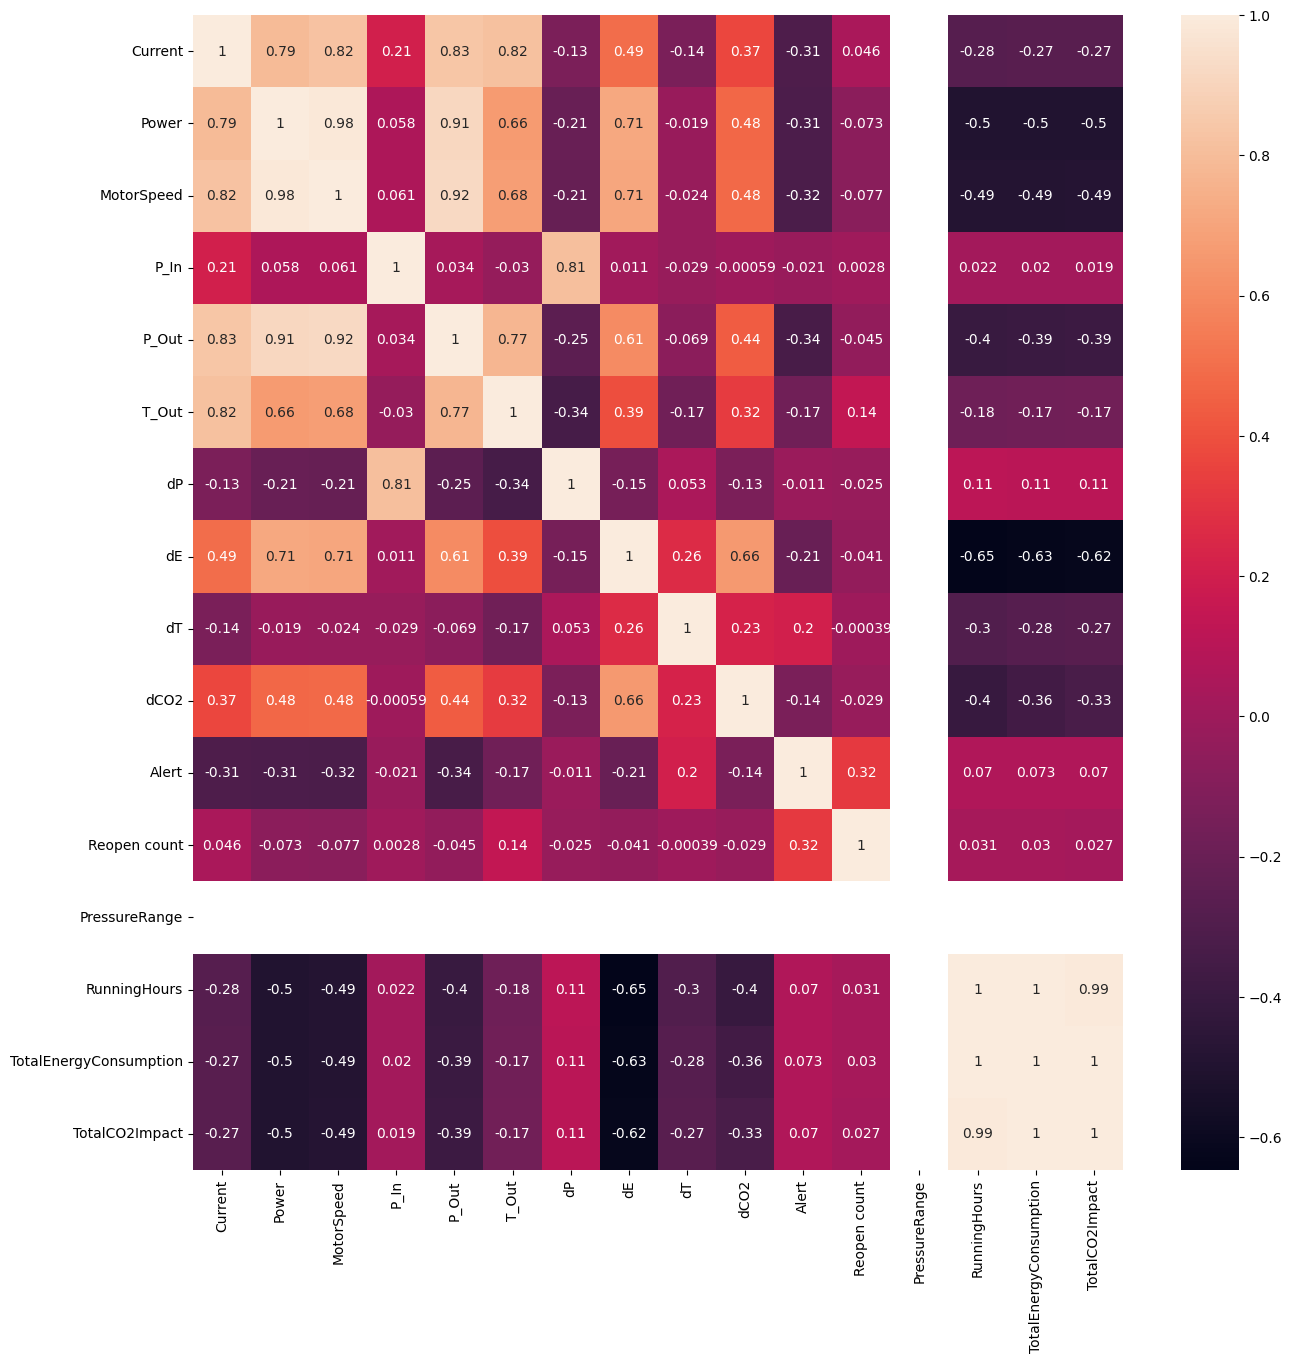

In [21]:
import seaborn as sns
corr = scaled_df_3.corr()

plt.figure(figsize=[15,15])
sns.heatmap(corr, annot=True)
plt.show()

In [22]:

path = "scaled_df_"+run+".csv"
scaled_df_3.to_csv(path, index=False)